**Sklearn's Preprocessing Tools**: StandardScaler for standardizing features and LabelEncoder for converting categorical variables into numerical values.<br>
**UMAP**: A dimensionality reduction technique that maps high-dimensional data into a lower-dimensional space, preserving the significant structure of the data.<br>
**KMeans**: An unsupervised clustering algorithm that partitions the data into K distinct clusters.<br>
**RandomForestClassifier**: An ensemble learning method used for classification, operating by constructing multiple decision trees.

**SETUP**

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=5b46c2c1edf4ce1b570c40e88ef5daeca0df09dd3eef9040af4dbb86bd422d34
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD THE DATASET**

In [4]:
url = '/content/StudentsPerformance.csv'
df = pd.read_csv(url)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Data Preprocessing:**

**Categorical Encoding:** The LabelEncoder is used to transform non-numerical labels into numerical labels. This is necessary because many machine learning algorithms require numerical input.

In [5]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

**Data Standardization:** The StandardScaler standardizes the features by removing the mean and scaling to unit variance. This is important because features might be measured in different units, and we want to standardize these features for comparable scales.

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Dimensionality Reduction using UMAP:

**UMAP (Uniform Manifold Approximation and Projection)** is applied to reduce the high-dimensional data into a two-dimensional space. This step is crucial for visualizing high-dimensional datasets and can also improve the performance of clustering and classification algorithms.<br>
The parameters n_neighbors, min_dist, n_components, and random_state are set to control the behavior of the reduction.

In [7]:
umap_reducer = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(scaled_features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# KMeans Clustering:

**KMeans clustering algorithm** is used to partition the data into K clusters. It groups the data points into clusters such that the variance within each cluster is minimized.<br>
The number of clusters n_clusters and random_state are specified for reproducibility.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(umap_embedding)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualization of Clusters:

A scatter plot is created using Matplotlib and Seaborn to visualize the results of UMAP dimensionality reduction and KMeans clustering.
This visual representation helps in understanding the data distribution and the effectiveness of the clustering.

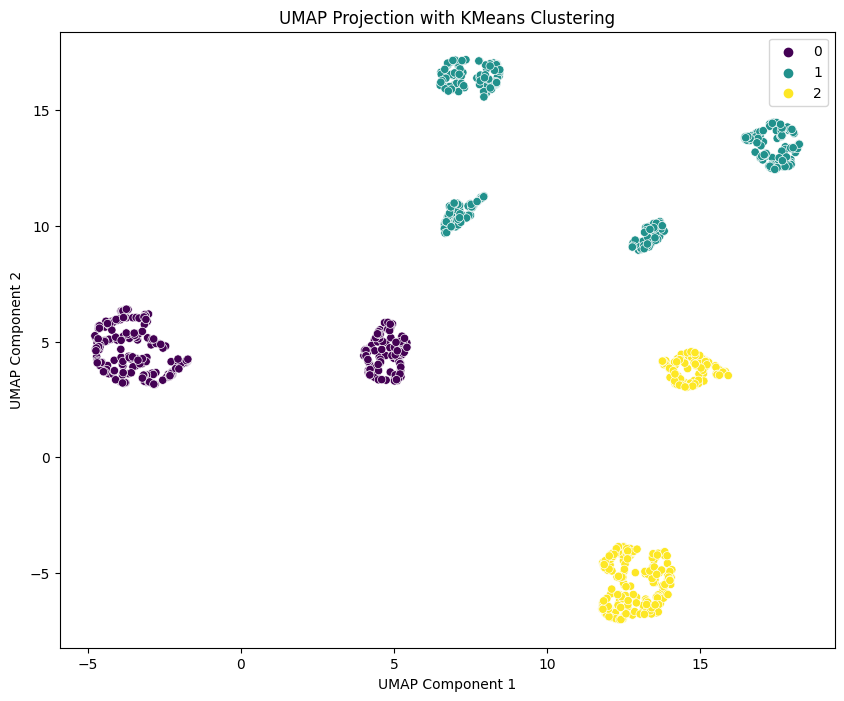

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=clusters, palette='viridis')
plt.title('UMAP Projection with KMeans Clustering')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

# Feature Extraction and Classification using Random Forest:

The dataset is split into training and testing sets using train_test_split.
A Random Forest Classifier is trained on the training data. Random forests are particularly good for high-dimensional data and do not require feature selection.
The classifier is then used to predict the cluster labels of the test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, clusters, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluating the Classifier:

The predictions are compared with the true labels of the test set, and the classification accuracy is calculated using accuracy_score.
The accuracy score provides a measure of how well the model is able to classify new data points correctly.

In [11]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy:.2f}')

Classification Accuracy: 1.00
